In [141]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import scipy.stats as stats

%matplotlib inline

np.random.seed(364)
n = 30
y0 = np.random.randn(n, )
x = np.sort(1/(1+np.exp(-4*(y0+1)))+(1/(1+np.exp(-y0))+2/(1+np.exp(-6*(y0-2)))))-1.2

cdf = np.cumsum(1/n * np.ones(n))

### Convex optimization program to transform x to y such that y is approximately standard normal

In [127]:
Dmax = 0.05

y = cp.Variable(n)

lhs = np.maximum(0, np.arange(1, n+1) / n - Dmax)
rhs = np.minimum(1, np.arange(0, n) / n + Dmax)

lhs_percentiles = stats.norm.ppf(lhs) #first entry is -inf
rhs_percentiles = stats.norm.ppf(rhs) #last entry is inf

lhs_mask = lhs_percentiles != -np.Inf
rhs_mask = rhs_percentiles != np.Inf

constraints = [
    y[lhs_mask] >= lhs_percentiles[lhs_mask],
    y[rhs_mask] <= rhs_percentiles[rhs_mask],
    cp.diff(y) >= 0
]

slope_i = cp.multiply(y[2:] - y[1:n-1], cp.inv_pos(x[2:] - x[1:n-1]))
slope_i_minus_1 = cp.multiply(y[1:n-1] - y[0:n-2], cp.inv_pos(x[1:n-1] - x[0:n-2]))

objective = cp.Minimize(cp.norm1(slope_i - slope_i_minus_1))

problem = cp.Problem(objective, constraints)
problem.solve()

print("status:", problem.status)
print("optimal value", problem.value)

y = y.value
cdf_y = np.ones(n) * 1/n

status: optimal
optimal value 8.091485375798744


Text(0.5, 1.0, 'Phi function')

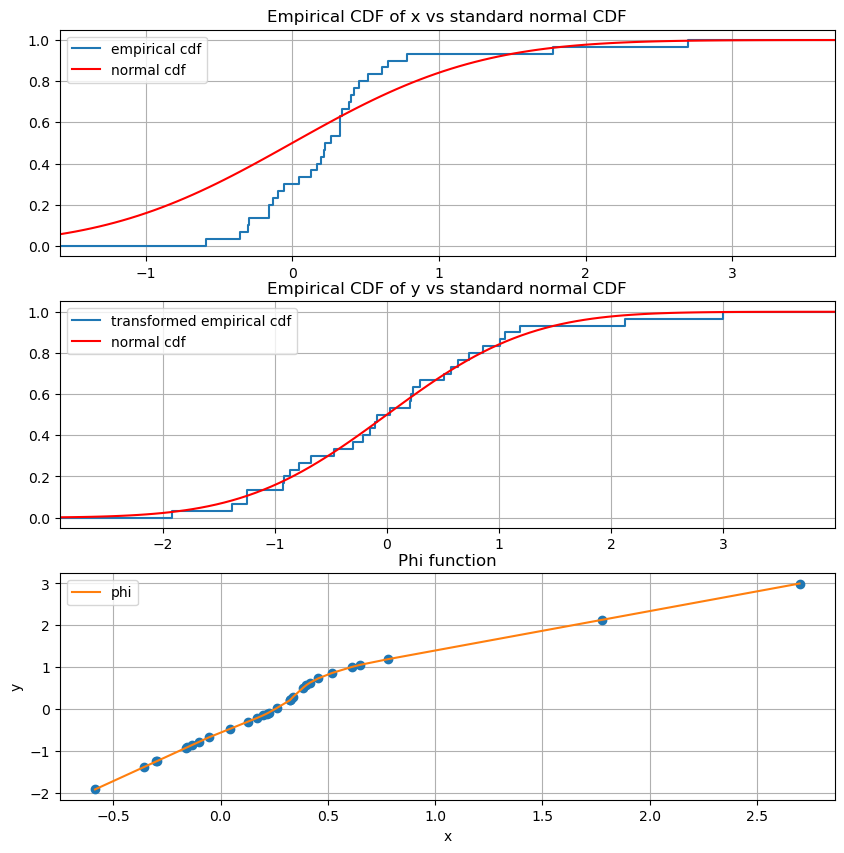

In [142]:
# 3x1 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

x_l = np.min(x) - 1
x_u = np.max(x) + 1
x_new = np.linspace(x_l, x_u, 100)

axs[0].set_xlim(x_l, x_u)
axs[0].step(np.insert(x, [0, n], [x_l, x_u]), np.insert(cdf, [0, 0], [0, 0]), label='empirical cdf')
axs[0].plot(x_new, stats.norm.cdf(x_new), 'r', label='normal cdf')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Empirical CDF of x vs standard normal CDF')

y_l = np.min(y) - 1
y_u = np.max(y) + 1
y_new = np.linspace(y_l, y_u, 100)

axs[1].set_xlim(y_l, y_u)
axs[1].step(np.insert(y, [0, n], [y_l, y_u]), np.insert(cdf, [0, 0], [0, 0]), label='transformed empirical cdf')
axs[1].plot(y_new, stats.norm.cdf(y_new), 'r', label='normal cdf')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Empirical CDF of y vs standard normal CDF')

axs[2].plot(x, y, 'o')
axs[2].plot(x, y, label='phi')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend()
axs[2].grid()
axs[2].set_title('Phi function')

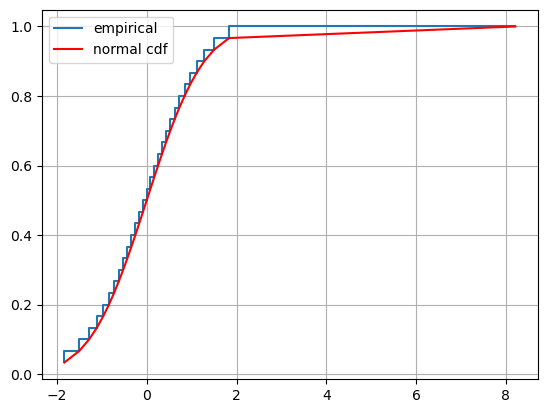

In [164]:
# Naive solution ??
y = stats.norm.ppf(np.cumsum(np.ones(n)/n))
plt.step(y, cdf, label='empirical')
plt.plot(y, stats.norm.cdf(y), 'r', label='normal cdf')
plt.grid()
plt.legend()